**Identifying the regions and selecting only the text regions**

In [ ]:
!pip install -U layoutparser
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'
!pip install layoutparser[ocr]
!pip install spacy
!pip install spacy-transformers
!python -m spacy download en_core_web_trf
!pip install click==7.1.1
!git clone https://github.com/Layout-Parser/layout-parser.git
!sudo apt install tesseract-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 95.2 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31530 sha256=d619c35d3124021f58befed61407b5c5f80c601288ecdc1c2d2c756a9a0be13d
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built iopath
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-62cbxxt9/detectron2_0ec339f07b85414a9286cc96578d6203
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.1
    Uninstalling google-api-core-2.11.1:
      Successfully uninstalled google-api-core-2.11.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.8/190.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.2 MB/s eta 0:00:00
2023-08-16 17:19:25.743732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 17:19:26.669613: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-16 17:19:28.198120: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_ex

In [ ]:
%cd layout-parser/

/content/layout-parser


In [ ]:
import cv2
sample = cv2.imread('/content/ezgif.com-webp-to-jpg.jpg')
sample = sample[...,::-1]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


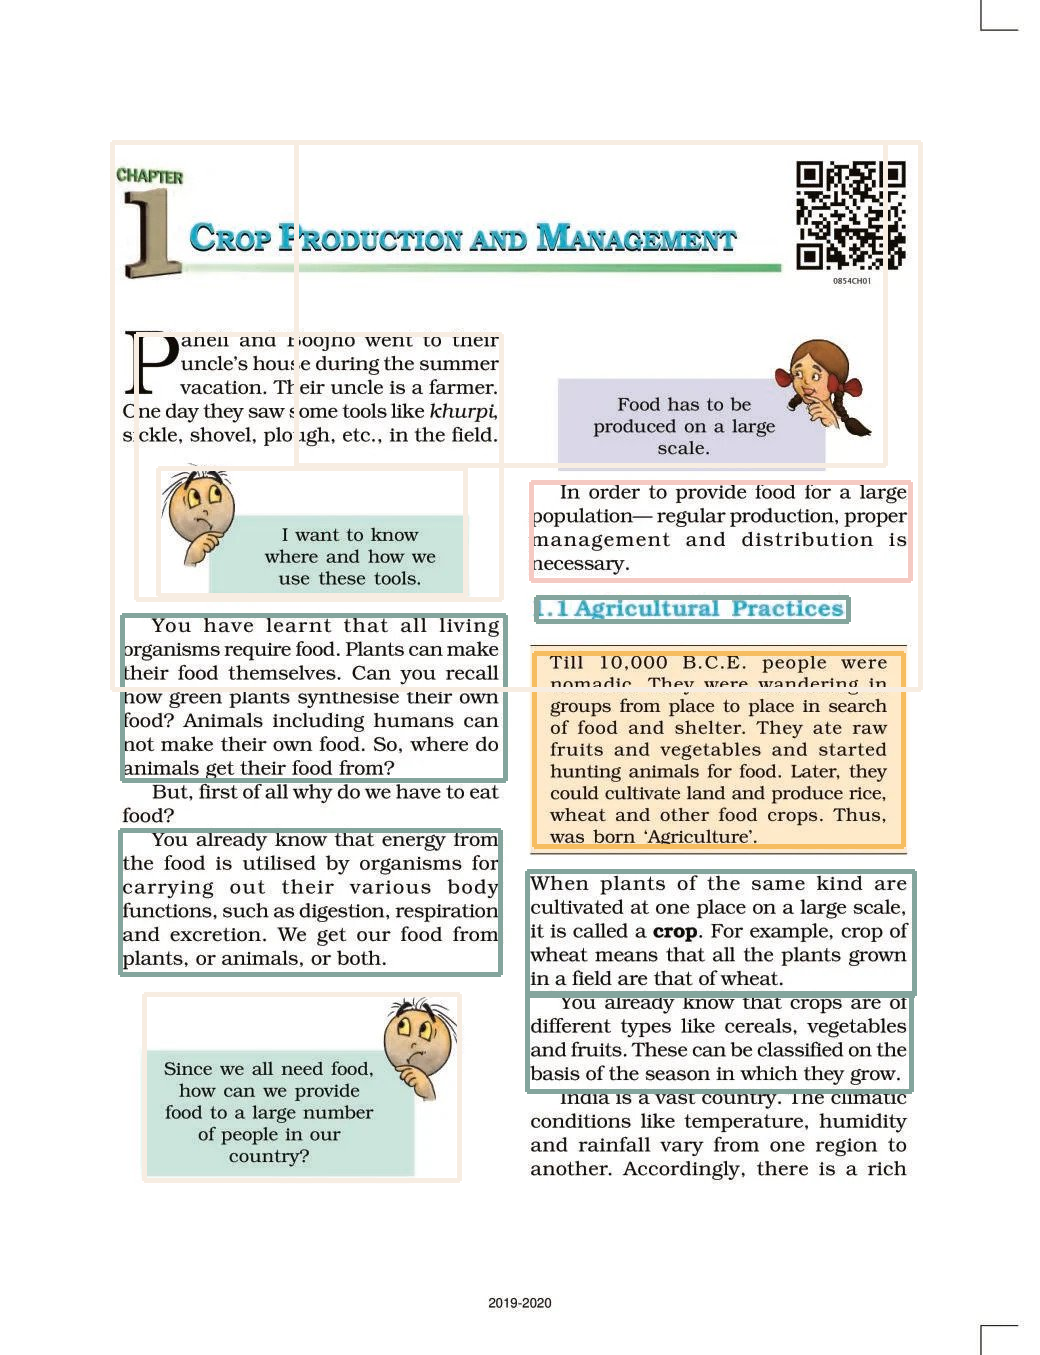

In [ ]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_R_50_FPN_3x/config', extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST",0.70],label_map = {0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(sample)
lp.draw_box(sample, layout,)

In [ ]:
text_layouts = lp.Layout([box for box in layout if box.type=='Text'])
figure_layouts = lp.Layout([fig for fig in layout if fig.type=='Figure'])
text_blocks_1 = lp.Layout([b for b in text_layouts\
                        if not any (b.is_in(fig) for fig in figure_layouts)])
h,w = sample.shape[:2]
left_interval = lp.Interval(0, w/2*1.05,axis='x').put_on_canvas(sample)
left_blocks = text_blocks_1.filter_by(left_interval, center=True)
left_blocks.sort(key=lambda b:b.coordinates[1])
right_blocks = [b for b in text_blocks_1 if b not in left_blocks]
right_blocks.sort(key=lambda b:b.coordinates[1])

text_blocks_2 = lp.Layout([b.set(id=idx) for idx,b in enumerate(left_blocks+right_blocks)])
print(f"Before combining blocks: {text_blocks_1}\nAfter combining blocks: {text_blocks_2}")

Before combining blocks: Layout(_blocks=[TextBlock(block=Rectangle(x_1=120.68267059326172, y_1=830.43896484375, x_2=500.93597412109375, y_2=974.0923461914062), text=None, id=None, type=Text, parent=None, next=None, score=0.9289469122886658), TextBlock(block=Rectangle(x_1=527.7124633789062, y_1=993.1300659179688, x_2=911.6399536132812, y_2=1091.125244140625), text=None, id=None, type=Text, parent=None, next=None, score=0.926601767539978), TextBlock(block=Rectangle(x_1=527.6046142578125, y_1=871.4940795898438, x_2=914.3609619140625, y_2=995.4624633789062), text=None, id=None, type=Text, parent=None, next=None, score=0.8818297386169434), TextBlock(block=Rectangle(x_1=122.7839584350586, y_1=615.6581420898438, x_2=505.9864196777344, y_2=780.151611328125), text=None, id=None, type=Text, parent=None, next=None, score=0.8745524287223816)], page_data={})
After combining blocks: Layout(_blocks=[TextBlock(block=Rectangle(x_1=120.68267059326172, y_1=830.43896484375, x_2=500.93597412109375, y_2=974

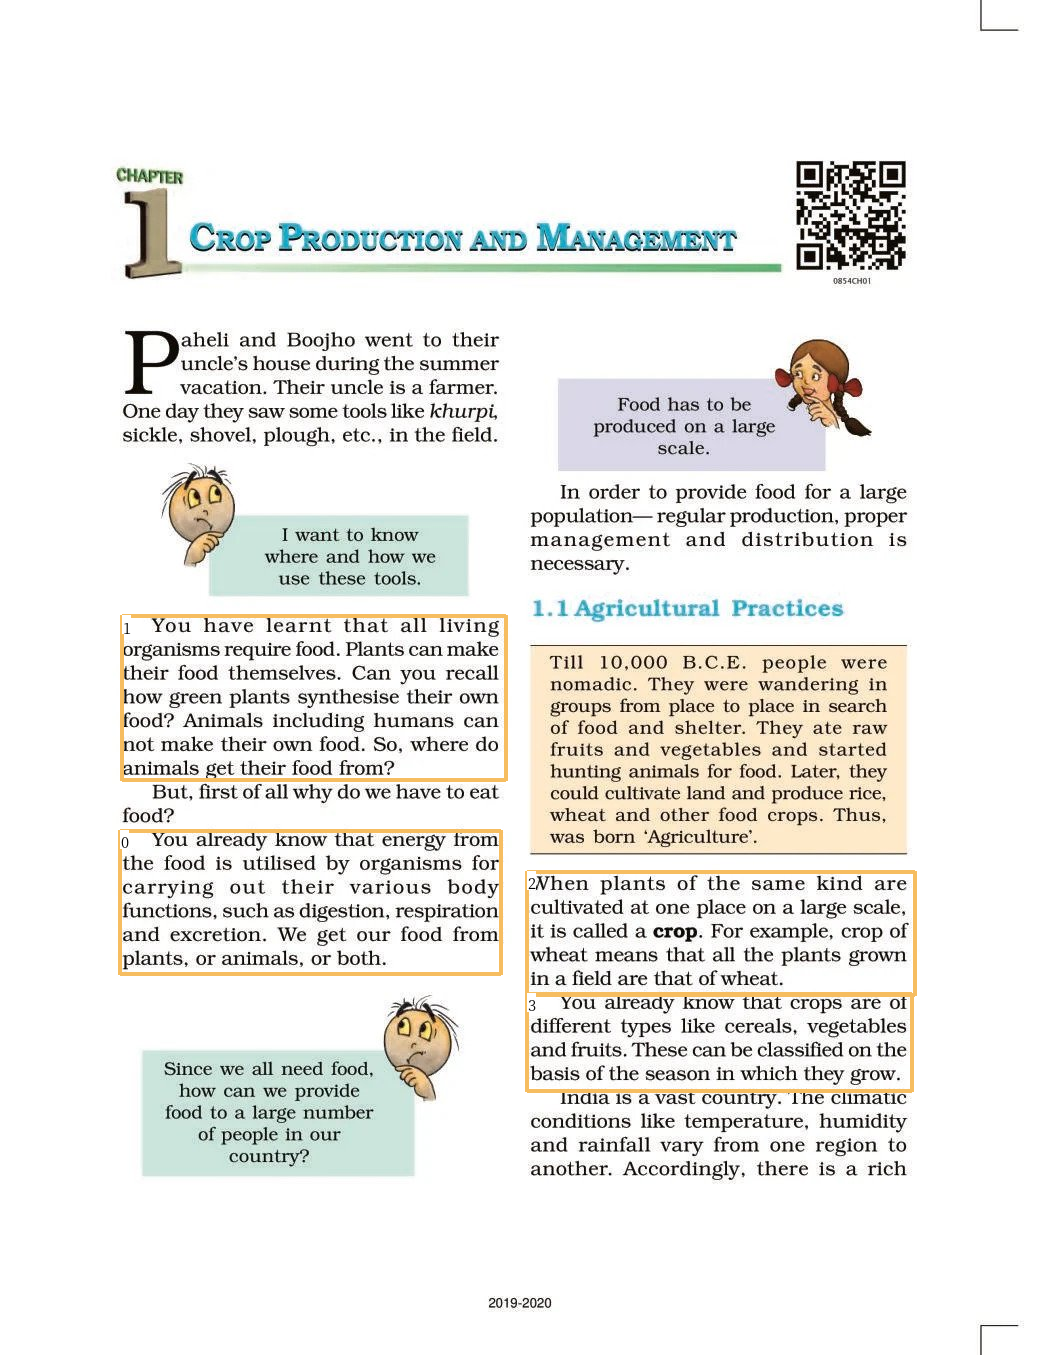

In [ ]:
lp.draw_box(sample,text_blocks_2,box_width=4, show_element_id=True)

**Reading the Text**

In [ ]:
!pip install --upgrade google-api-core
!pip install --upgrade google-cloud-vision

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [ ]:
ocr = lp.TesseractAgent(languages='eng')
for block in text_blocks_2:
  cropped_image = (block.pad(left=5,right=5,top=5,bottom=5).crop_image(sample))
  text = ocr.detect(cropped_image)
  block.set(text=text, inplace=True)

**Result of text extraction from selected layout regions**

In [ ]:
for text in text_blocks_2.get_texts():
  print(text, end='\n')

You already know that energy from
the food is utilised by organisms for
carrying out their various body
functions, such as digestion, respiration
and excretion. We get our food from
plants, or animals, or both.

You have learnt that all living
organisms require food. Plants can make
their food themselves. Can you recall
how green plants synthesise their own
food? Animals including humans can
not make their own food. So, where do
animals get their food from?

 

 

When plants of the same kind are
cultivated at one place on a large scale,
it is called a crop. For example, crop of
wheat means that all the plants grown
in a field are that of wheat.

 

 

You already know that crops are of
different types like cereals, vegetables
and fruits. These can be classified on the
basis of the season in which h they grow.

ae

 

   



In [ ]:
import spacy
slm = spacy.load('en_core_web_trf')
sentence=[''.join(text) for text in text_blocks_2.get_texts()]
d_doc = slm(''.join(sentence))
print(d_doc)
# for entity in d_doc.ents:
#   print(entity.text,entity.label_)

You already know that energy from
the food is utilised by organisms for
carrying out their various body
functions, such as digestion, respiration
and excretion. We get our food from
plants, or animals, or both.
You have learnt that all living
organisms require food. Plants can make
their food themselves. Can you recall
how green plants synthesise their own
food? Animals including humans can
not make their own food. So, where do
animals get their food from?

 

 
When plants of the same kind are
cultivated at one place on a large scale,
it is called a crop. For example, crop of
wheat means that all the plants grown
in a field are that of wheat.

 

 
You already know that crops are of
different types like cereals, vegetables
and fruits. These can be classified on the
basis of the season in which h they grow.

ae

 

   

